In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../../../dataset/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.rename(index=str, columns={'Annual Income (k$)'  : 'A_Income', 'Spending Score (1-100)': 'Score'}, inplace=True)
data

,CustomerID,Gender,Age,A_Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
new_data = data.drop(['CustomerID', 'Gender'], axis=1)
new_data

,Age,A_Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [5]:
data.describe()
data.isnull().sum()

CustomerID    0
Gender        0
Age           0
A_Income      0
Score         0
dtype: int64

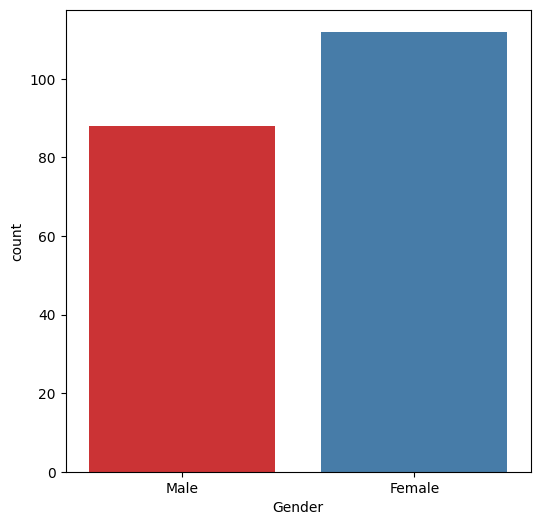

In [6]:
plt.figure(1, figsize=(6,6))
sns.countplot(x = 'Gender', data = data, palette = 'Set1')
plt.show()

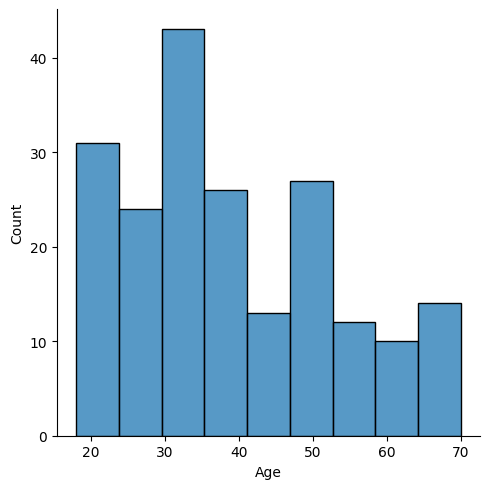

In [7]:
plt.Figure(figsize=(8,6))
sns.displot(data["Age"])
plt.xlabel("Age")
plt.show()

Text(0.5, 1.0, 'KMeans with One Cluster')

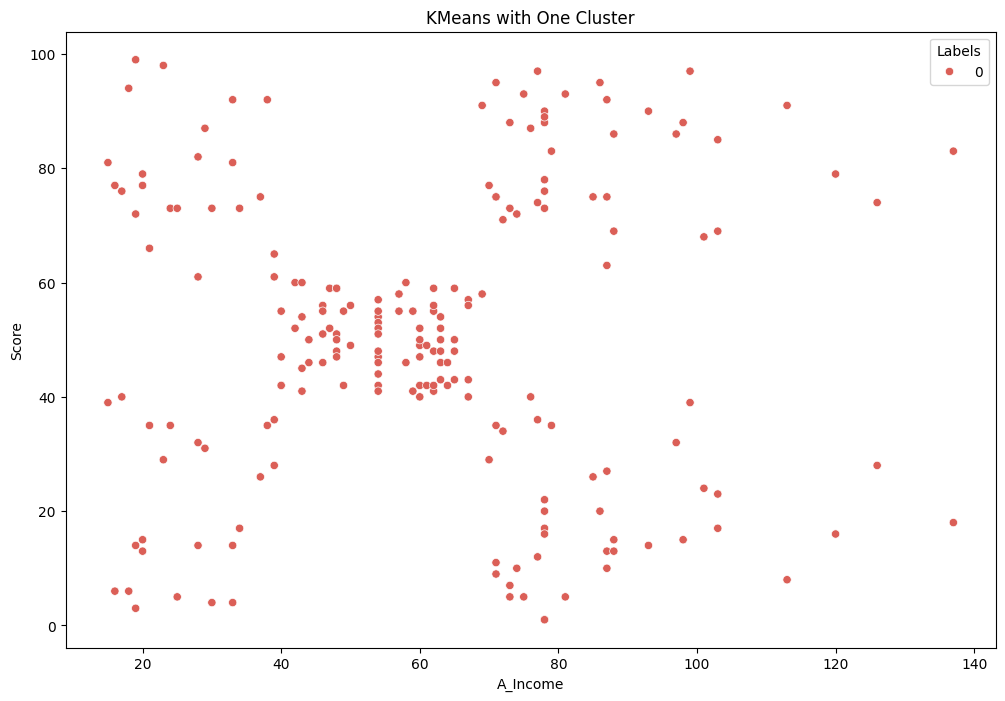

In [8]:
km1 = KMeans(n_clusters=1).fit(new_data)

new_data['Labels'] = km1.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x = new_data['A_Income'], y = new_data['Score'], hue = new_data['Labels'], palette=sns.color_palette('hls',3))
plt.title('KMeans with One Cluster')

Text(0.5, 1.0, 'KMeans with One Cluster')

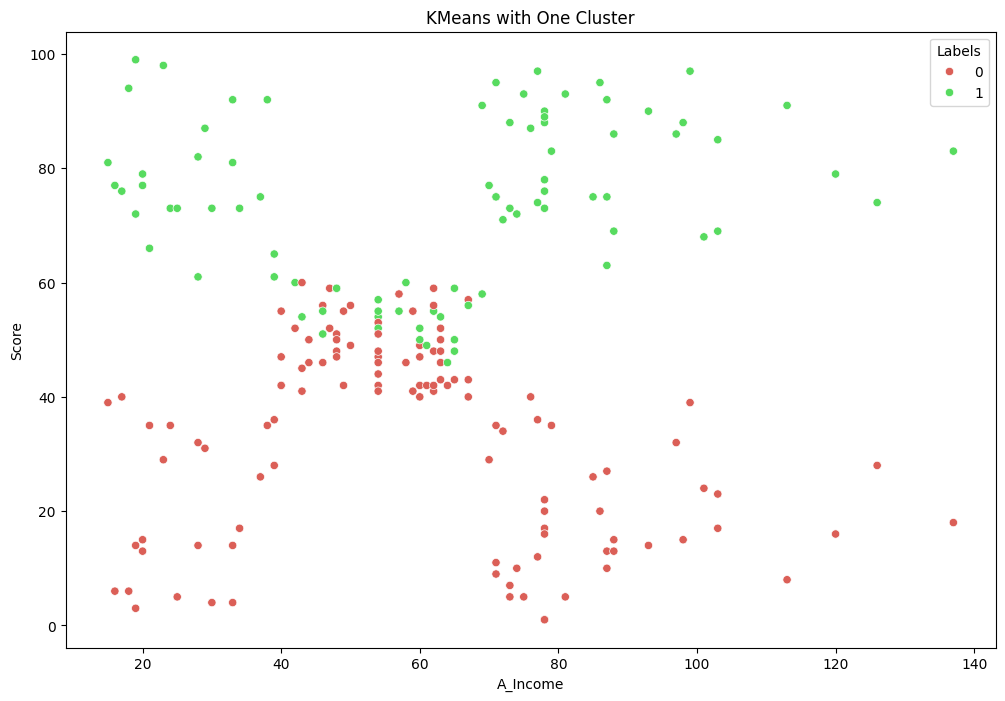

In [9]:
km2 = KMeans(n_clusters=2).fit(new_data)

new_data['Labels'] = km2.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x = new_data['A_Income'], y = new_data['Score'], hue = new_data['Labels'], palette=sns.color_palette('hls',3))
plt.title('KMeans with One Cluster')

Text(0.5, 1.0, 'KMeans with One Cluster')

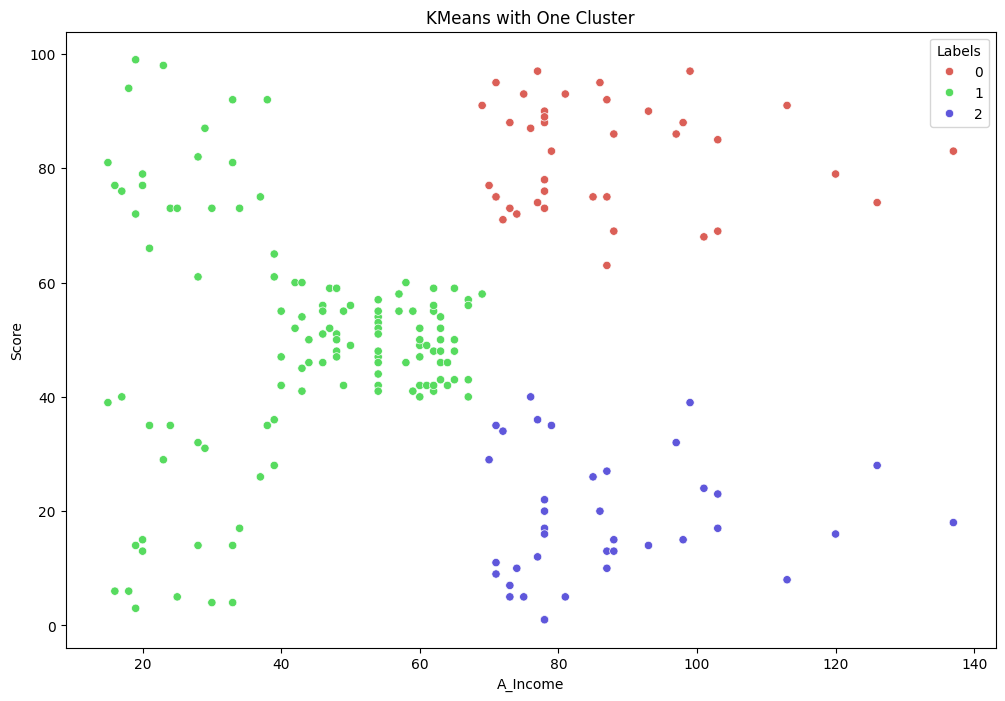

In [10]:
km3 = KMeans(n_clusters=3).fit(new_data)

new_data['Labels'] = km3.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x = new_data['A_Income'], y = new_data['Score'], hue = new_data['Labels'], palette=sns.color_palette('hls',3))
plt.title('KMeans with One Cluster')

Text(0.5, 1.0, 'KMeans with One Cluster')

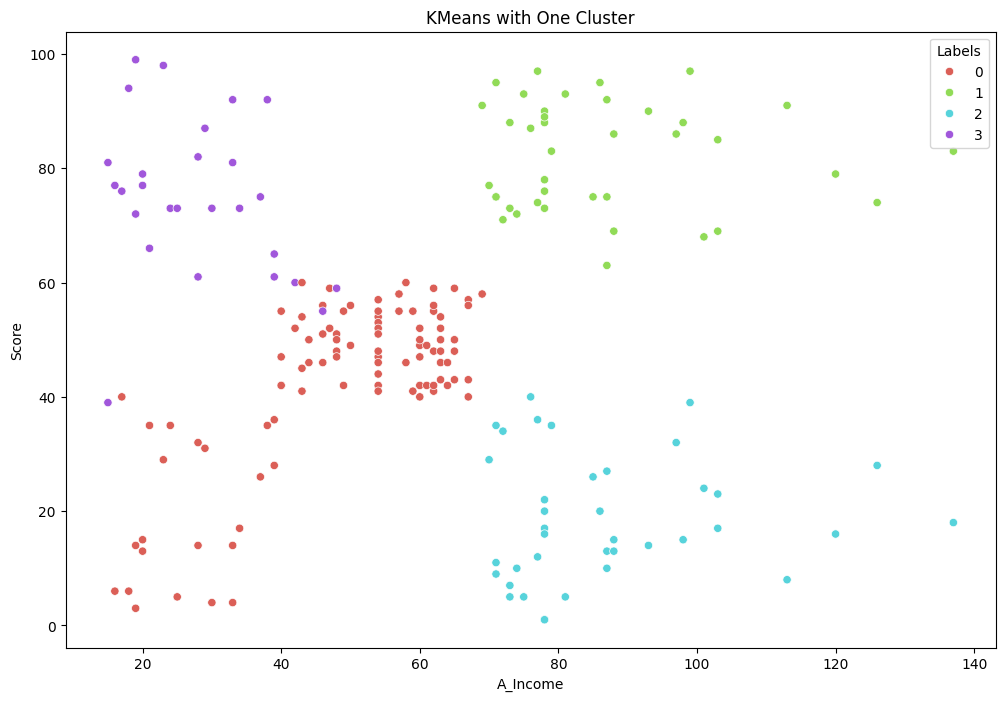

In [11]:
km4 = KMeans(n_clusters=4).fit(new_data)

new_data['Labels'] = km4.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x = new_data['A_Income'], y = new_data['Score'], hue = new_data['Labels'], palette=sns.color_palette('hls',4))
plt.title('KMeans with One Cluster')

Text(0.5, 1.0, 'KMeans with One Cluster')

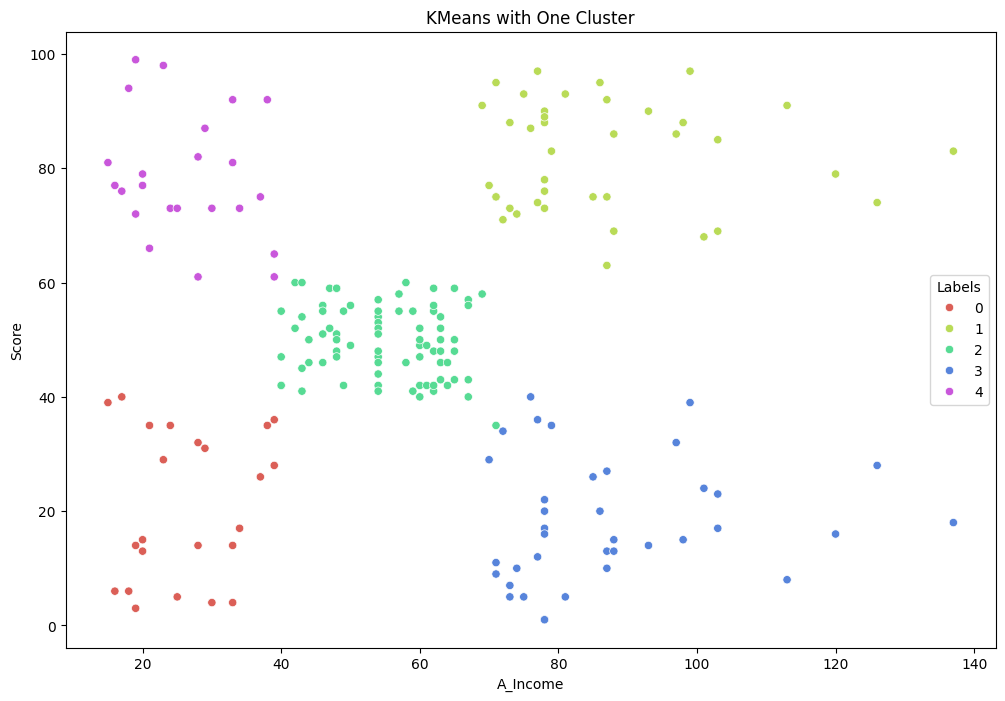

In [12]:
km5 = KMeans(n_clusters=5).fit(new_data)

new_data['Labels'] = km5.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x = new_data['A_Income'], y = new_data['Score'], hue = new_data['Labels'], palette=sns.color_palette('hls',5))
plt.title('KMeans with One Cluster')

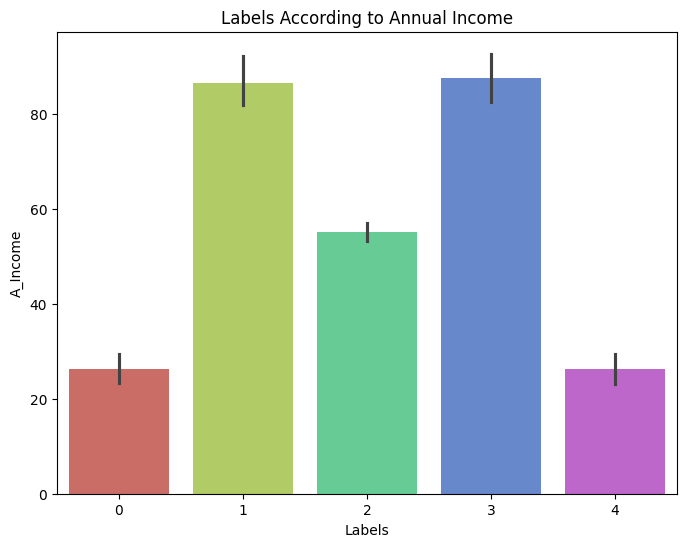

In [13]:
fig, axes = plt.subplots(figsize=(8,6))
sns.barplot (x = 'Labels', y = 'A_Income', data = new_data, palette=sns.color_palette('hls',5))
axes.set_title('Labels According to Annual Income')
plt.show()

In [14]:
X1 = data[['Age', 'Score']].iloc[:, :].values
inertia = []
for n in range(1, 11):
  algorithm = (KMeans(n_clusters=n, init='k-means++', n_init = 10, max_iter= 100, tol=0.0001, random_state=111, algorithm='elkan'))
  algorithm.fit(X1)
  inertia.append(algorithm.inertia_)

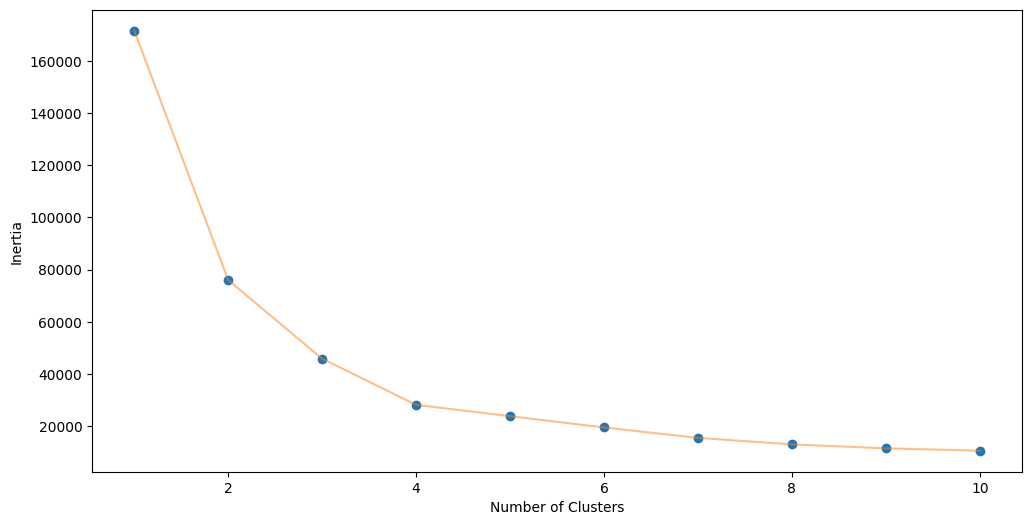

In [15]:
plt.figure(1, figsize=(12, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

Segmentation using Annual Income and Spending Score

In [16]:
X2 = data[['A_Income', 'Score']].iloc[:, :].values
inertia = []
for n in range(1, 11):
  algorithm = (KMeans(n_clusters=n, init='k-means++', n_init = 10, max_iter= 100, tol=0.0001, random_state=111, algorithm='elkan'))
  algorithm.fit(X2)
  inertia.append(algorithm.inertia_)

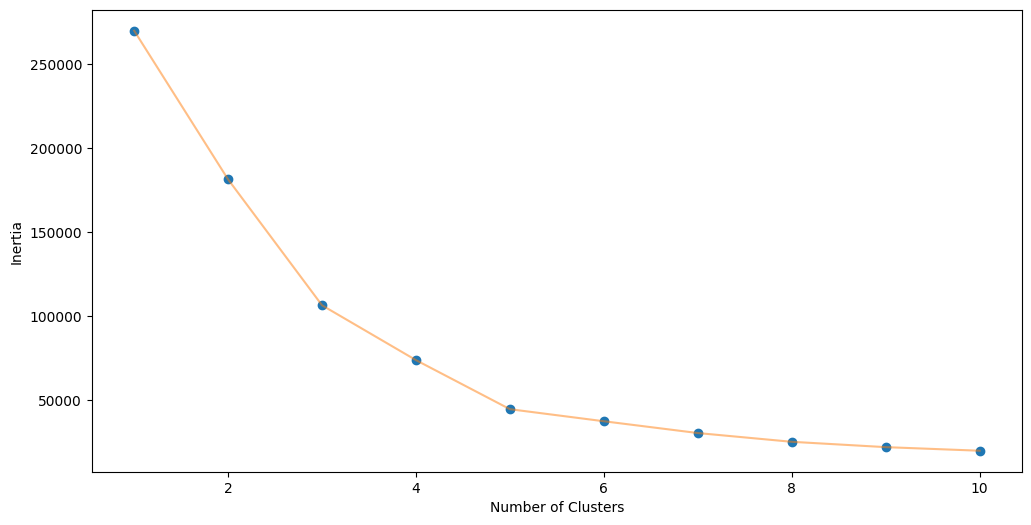

In [17]:
plt.figure(1, figsize=(12, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

Segmentation using Age, Spending Score and Annual Income

In [18]:
X3 = data[['Age', 'Score', 'A_Income']].iloc[:, :].values
inertia = []
for n in range(1, 11):
  algorithm = (KMeans(n_clusters=n, init='k-means++', n_init = 10, max_iter= 100, tol=0.0001, random_state=111, algorithm='elkan'))
  algorithm.fit(X3)
  inertia.append(algorithm.inertia_)

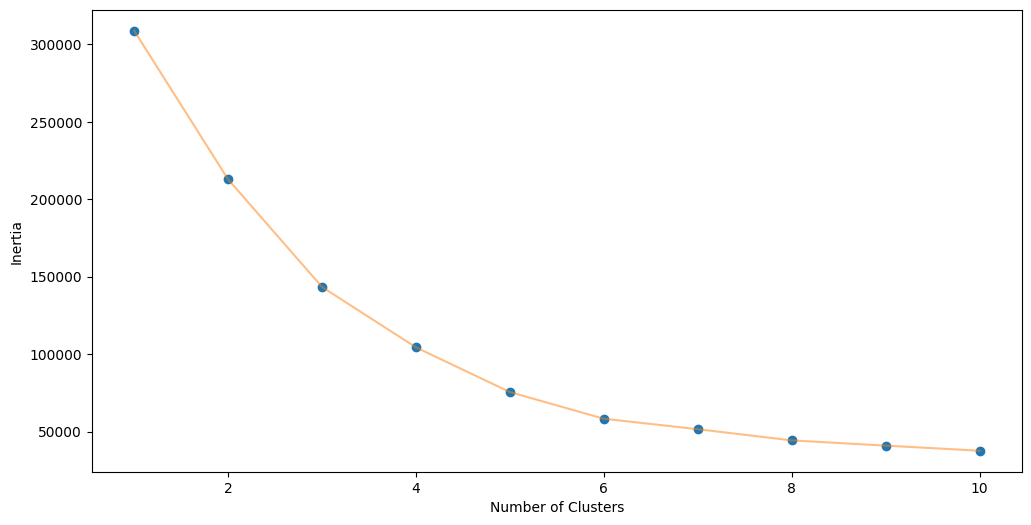

In [19]:
plt.figure(1, figsize=(12, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()